In [1]:
import cPickle as pickle
V1_data = pickle.load(open("LGN-V1-small-15-reg.p", "rb"))
dot_images = pickle.load(open("dot-images-15.p", "rb" ))

In [2]:
import numpy as np

def make_gabor(x, y, centre, frequency, phase, sigma, angle): 
    """ Make a Gabor kernel. """
    xx = x*np.cos(angle) - y*np.sin(angle)
    yy = x*np.sin(angle) + y*np.cos(angle)
    xx = xx-centre[0]
    yy = yy-centre[1]
    return np.cos(frequency*xx + phase) * np.exp(-xx**2/2/sigma[0]**2 -yy**2/2/sigma[1]**2)

ind = range(-200, 201, 2) 
x = np.tile(ind, (len(ind), 1))
y = x.transpose()
centre = [-20,-20]
frequency = 2*np.pi/32
phase = 0
sigma = [10,20]
gabor = make_gabor(x, y, centre, frequency, phase, sigma, 0)


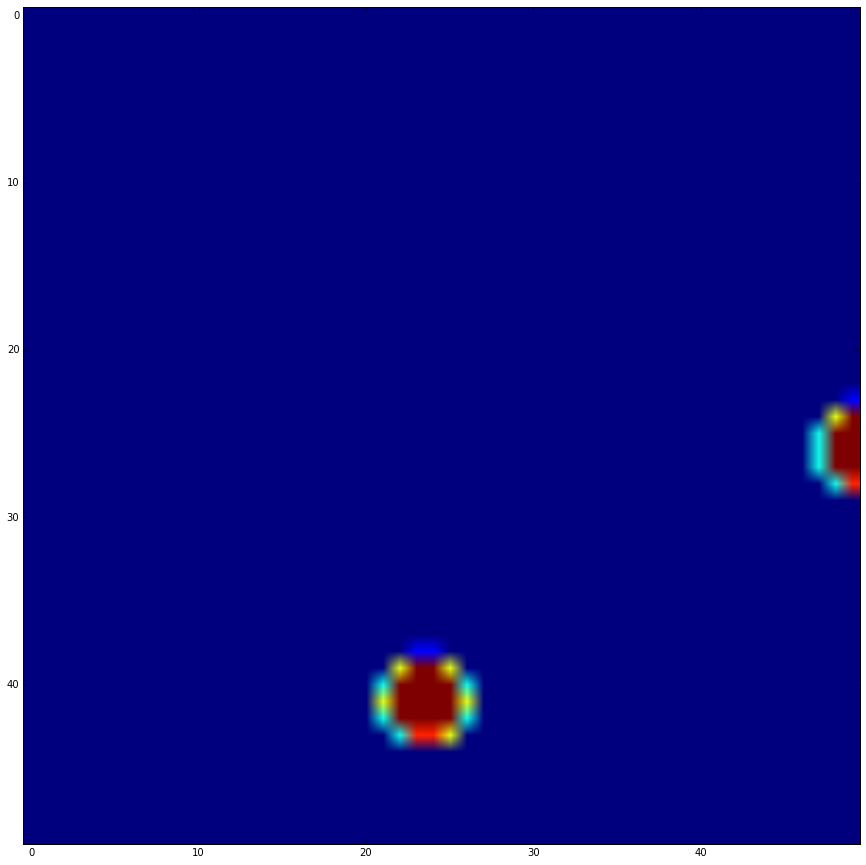

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

frame = 19
fig = plt.figure(figsize=(15,15), dpi=100)
#plt.imshow(gabor[0:200,0:200] + dot_images[0:-1:2,0:-1:2,frame]/20)
plt.imshow(dot_images[50:100,50:100,frame]/20)
# plt.imshow()

# plt.plot(V1_data[0:3,:].T)
# plt.gca().legend(["-pi/2", "0", "pi/2"])
plt.show()

In [4]:
# dot_images = pickle.load(open("dot-images-15.p", "rb" ))

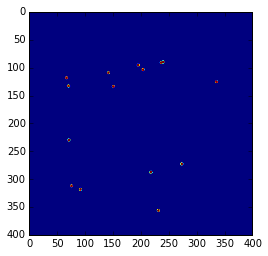

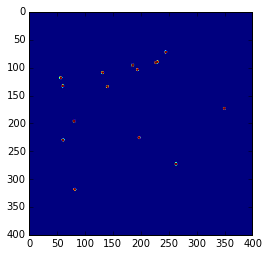

In [5]:
ind = 50
fig = plt.figure(figsize=(4,4), dpi=100)
plt.imshow(dot_images[:,:,ind])
fig = plt.figure(figsize=(4,4), dpi=100)
plt.imshow(dot_images[:,:,ind+1])

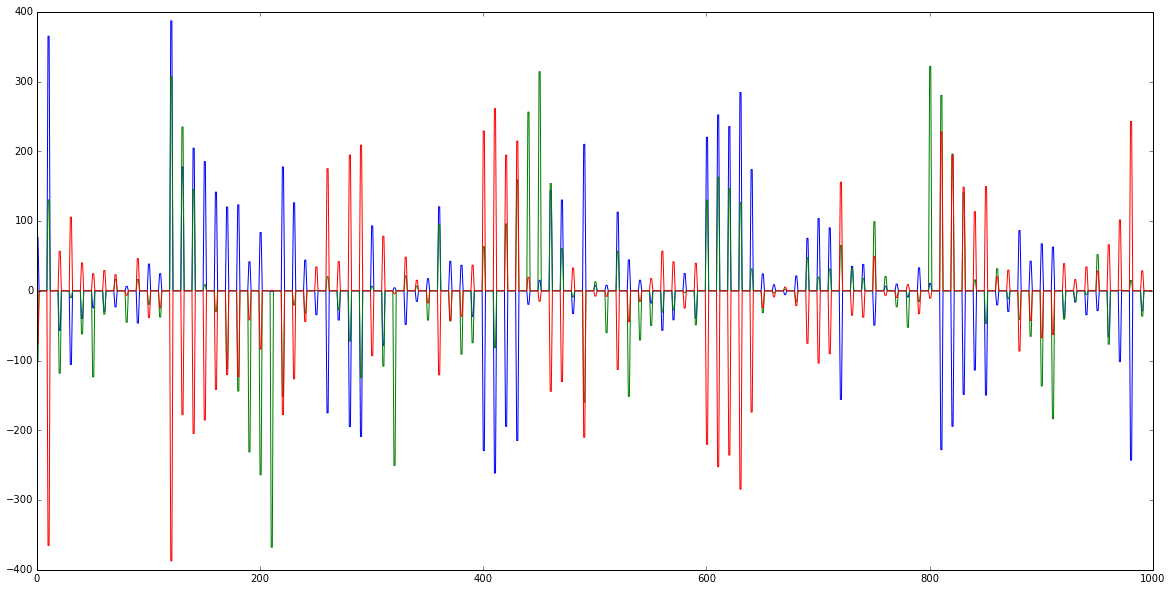

In [6]:
fig = plt.figure(figsize=(20,10), dpi=100)
plt.plot(V1_data[0:3,:].T)

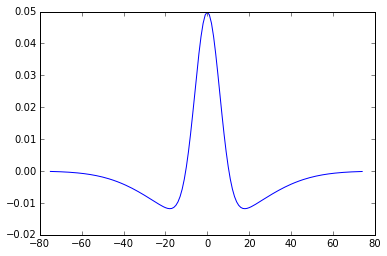

In [7]:
def make_DOG(inner_sigma, x): 
    """ Make a 1D difference-of-Gaussians kernel. """
    outer_sigma = inner_sigma*4
    inner_gaussian = 1./np.sqrt(2*np.pi)/inner_sigma * np.exp(-x**2/2./inner_sigma**2)
    outer_gaussian = 1./np.sqrt(2*np.pi)/outer_sigma * np.exp(-x**2/2./outer_sigma**2)
    return inner_gaussian - outer_gaussian
foo = np.arange(-75,75)
plt.plot(foo, make_DOG(6, foo))

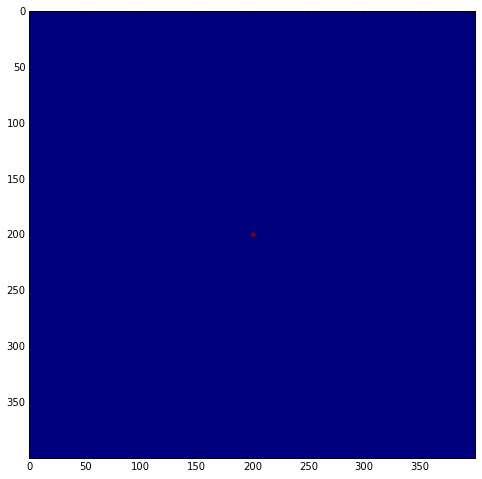

In [8]:
# making a dot manually 

dot_ind = range(-196, 197, 2) #don't probe edges
dotx = np.tile(dot_ind, (len(dot_ind), 1))
doty = dotx.transpose()
dotx_list = np.ndarray.flatten(dotx)
doty_list = np.ndarray.flatten(doty)

img_ind = range(-200, 200, 1)
imgx = np.tile(img_ind, (len(img_ind), 1))
imgy = imgx.transpose()

img = np.zeros_like(imgx)
radius = 2
mask = imgx**2+imgy**2 <= radius**2
img[mask] = 255
fig = plt.figure(figsize=(8,8), dpi=100)
plt.imshow(img)

In [9]:
img.shape

(400, 400)

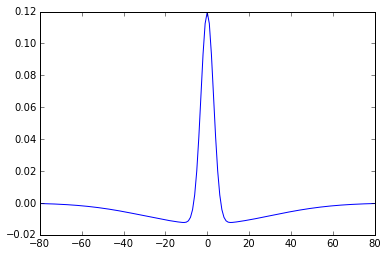

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def make_DOG(inner_sigma, x): 
    """ Make a 1D difference-of-Gaussians kernel. """
    outer_sigma = inner_sigma*10
    inner_gaussian = 1./np.sqrt(2*np.pi)/inner_sigma * np.exp(-x**2/2./inner_sigma**2)
    outer_gaussian = 1./np.sqrt(2*np.pi)/outer_sigma * np.exp(-x**2/2./outer_sigma**2)
    return inner_gaussian - outer_gaussian

x = np.arange(-80, 81)
DOG = make_DOG(3, x)
plt.plot(x, DOG)
plt.show()

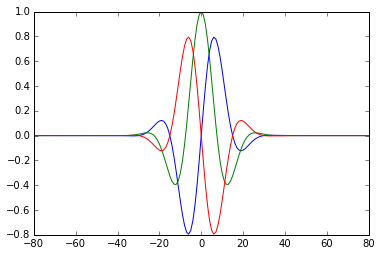

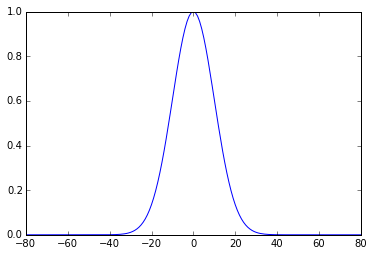

(161, 3)


In [11]:
def make_simple_gabor(x, frequency, phase, sigma): 
    """ Make a Gabor kernel. """
    return np.cos(frequency*x + phase) * np.exp(-x**2/2./sigma**2)

gabor_frequency = 2*np.pi/30
gaborx = np.zeros((len(x), 3))
gaborx[:,0] = make_simple_gabor(x, gabor_frequency, -np.pi/2, 10)
gaborx[:,1] = make_simple_gabor(x, gabor_frequency, 0, 10)
gaborx[:,2] = make_simple_gabor(x, gabor_frequency, np.pi/2, 10)

plt.plot(x, gaborx)
plt.show()

gabory = np.exp(-x**2/2./10**2)
plt.plot(x, gabory)
plt.show()

print gaborx.shape

In [12]:
dog_matrix = np.zeros((x.shape[0], x.shape[0]))
offsets = x
dog_padded = np.concatenate((np.zeros(80), DOG, np.zeros(80)))
for i in range(len(x)): 
    dog_matrix[i,:] = dog_padded[i:i+len(x)]

#plt.imshow(dog_matrix)
#plt.show()

#val, vec = np.linalg.eig(dog_matrix)

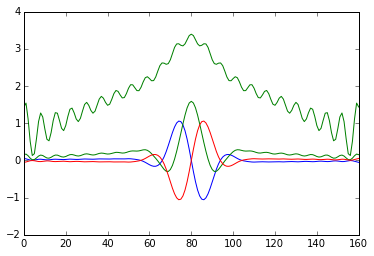

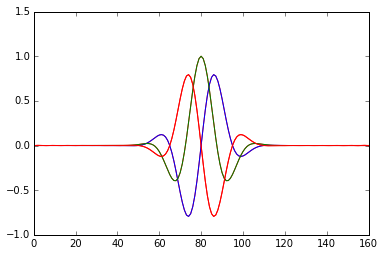

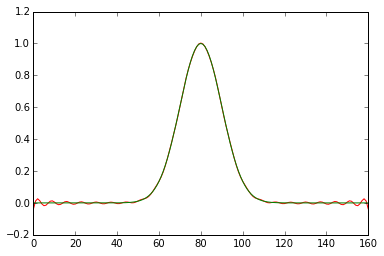

In [13]:
# plotting approximations of Gabors as weighted sums of DOGs 
gamma = np.dot(dog_matrix, dog_matrix.T)
inv_gamma = np.linalg.pinv(gamma, 1e-3)  
weightsx = np.dot(inv_gamma, np.dot(dog_matrix, gaborx))
weightsy = np.dot(inv_gamma, np.dot(dog_matrix, gabory))

plt.plot(weightsx)
plt.plot(weightsy, 'g')
plt.show()

approxx = np.dot(dog_matrix.T, weightsx)
plt.plot(approxx, 'r')
plt.plot(gaborx)
plt.show()

approxy = np.dot(dog_matrix.T, weightsy)
plt.plot(approxy, 'r')
plt.plot(gabory, 'g')
plt.show()

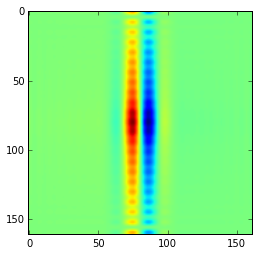

In [14]:
weightsxy = np.outer(weightsy, weightsx[:,0])
plt.imshow(weightsxy)
plt.show()

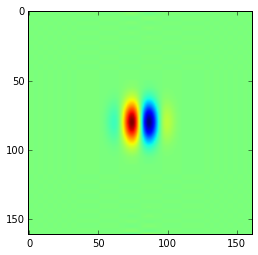

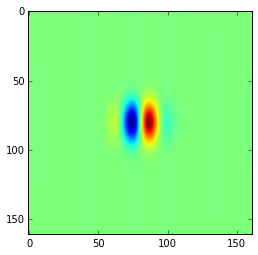

In [15]:
from scipy import ndimage as nd

dd1 = nd.filters.convolve1d(weightsxy, DOG, axis=0, mode='constant')    
dd2 = nd.filters.convolve1d(dd1, DOG, axis=1, mode='constant')

plt.imshow(dd2)
plt.show()

gaborxy = np.outer(gabory, gaborx[:,0])
plt.imshow(gaborxy)
plt.show()


In [16]:
dot_start = -36
dot_step = 4
dot_ind = range(dot_start, -dot_start+1, dot_step) #just probe central region (expect RF at centre)
dotx = np.tile(dot_ind, (len(dot_ind), 1))
doty = dotx.transpose()
dotx_list = np.ndarray.flatten(dotx)
doty_list = np.ndarray.flatten(doty)

#img_ind = range(-200, 200, 1)
imgx = np.tile(x, (len(x), 1))
imgy = imgx.transpose()

print dot_ind

[-36, -32, -28, -24, -20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 24, 28, 32, 36]


In [17]:
threshold = 10
V1_RF = np.zeros_like(dotx)

for i in range(len(dotx_list)):
    #print i

    img = np.zeros_like(imgx)
    radius = 2
    mask = (imgx-dotx_list[i])**2+(imgy-doty_list[i])**2 <= radius**2
    img[mask] = 255

    dd1 = nd.filters.convolve1d(img, DOG, axis=0)    
    dd2 = nd.filters.convolve1d(dd1, DOG, axis=1)
    LGN = np.zeros_like(dd2)
    LGN[dd2 > threshold] = 1
    #LGN = dd2
    V1 = np.dot(np.reshape(LGN, (-1)), np.reshape(weightsxy, (-1)))
    V1_RF[(doty_list[i]-dot_start)/dot_step, (dotx_list[i]-dot_start)/dot_step] = V1

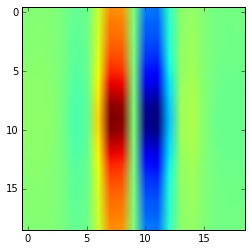

In [18]:
#plt.plot(V1_RF.T)
plt.imshow(V1_RF)
plt.show()

In [19]:
print x

[-80 -79 -78 -77 -76 -75 -74 -73 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63
 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45
 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27
 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9
  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9
  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80]
